In [ ]:
"""
Uses BERT to generate sentence embeddings and compare sentence similarity 
"""
from bert_serving.client import BertClient

## 3 documents are all 10Qs from Apple 
sentences = []

sentences += open(f"../resources/filtered/0.txt").read().split('.')[:740]
# for doc in documents:
#     doc_sent = open(f"../resources/{doc}").read().split('.')[:740]
#     sentences += doc_sent
#     print(doc_sent)
call_lines = open(f"../resources/call/call.txt").read().split('\n\n')
call_sents = [sent for sent in call_lines if len(sent) > 20]
sentences += call_sents[:740]
sentences += call_sents[740:1480]
non_empty = [sentence for sentence in sentences if len(sentence) > 0]

In [1]:
"""
Uses BERT to generate sentence embeddings and compare sentence similarity
"""
from bert_serving.client import BertClient
### the first document is an Apple 10Q, the other 2 documents are from a financial call 
sentences = []

sentences += open(f"../resources/filtered/0.txt").read().split('.')[:740]
# for doc in documents:
#     doc_sent = open(f"../resources/{doc}").read().split('.')[:740]
#     sentences += doc_sent
#     print(doc_sent)
call_lines = open(f"../resources/call/call.txt").read().split('\n\n')
call_sents = [sent for sent in call_lines if len(sent) > 20]
sentences += call_sents[:740]
sentences += call_sents[740:1480]
non_empty = [sentence for sentence in sentences if len(sentence) > 0]


bc = BertClient()
vectors=bc.encode(non_empty)
print(vectors)




/Users/andrew/.local/share/virtualenvs/financialsummary-uGePAaB3/lib/python3.7/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=50" set on the server, as consequence you may get less-accurate or truncated embeddings.
here is what you can do:
- disable the length-check by create a new "BertClient(check_length=False)" when you do not want to display this warning
- or, start a new server with a larger "max_seq_len"
  '- or, start a new server with a larger "max_seq_len"' % self.length_limit)


[[ 0.30229375  0.51445585  0.8663824  ... -0.27670416 -0.02666094
  -0.24133253]
 [ 0.38225195  0.56831706  0.5232722  ... -0.4396592   0.41828185
   0.07431965]
 [ 0.13062873  0.56988686  0.19007398 ... -0.3400016   0.05623284
  -0.12982665]
 ...
 [-0.03623833 -0.38568616  0.5390847  ...  0.22622508  0.606936
  -0.34000096]
 [ 0.06885155 -0.46721447  0.70955676 ... -0.04252765  0.7514735
  -0.17165266]
 [-0.2978498  -0.16317499  0.62377036 ... -0.25264272  0.6219753
   0.09065066]]


In [ ]:
bc = BertClient()
vectors=bc.encode(non_empty)

print(vectors)

In [6]:
import numpy as np 
num_sent = np.shape(vectors)[0]

cosine = np.zeros([num_sent, num_sent])
for i in range(num_sent):
    for j in range(num_sent):
        cosine[i][j] = 1.0 * np.dot(vectors[i,:], vectors[j,:])\
                       / (np.linalg.norm(vectors[i,:]) * np.linalg.norm
        (vectors[j,:]))

cosine

    

array([[0.99999992, 0.80424079, 0.8202698 , ..., 0.5855667 , 0.5356786 ,
        0.57087285],
       [0.80424079, 1.00000008, 0.87706416, ..., 0.57586334, 0.51312451,
        0.54009931],
       [0.8202698 , 0.87706416, 1.        , ..., 0.58146589, 0.51575525,
        0.55204155],
       ...,
       [0.5855667 , 0.57586334, 0.58146589, ..., 1.        , 0.81287559,
        0.84759128],
       [0.5356786 , 0.51312451, 0.51575525, ..., 0.81287559, 1.        ,
        0.87532237],
       [0.57087285, 0.54009931, 0.55204155, ..., 0.84759128, 0.87532237,
        1.        ]])

In [3]:
## get the maximum cosine similarities of two words

## kill off the diagonal
np.fill_diagonal(cosine, 0.0)
maxes = np.amax(cosine, 1)

print(maxes)


[0.95694653 1.00000008 0.99999991 ... 0.90351528 0.92543191 0.9608748 ]


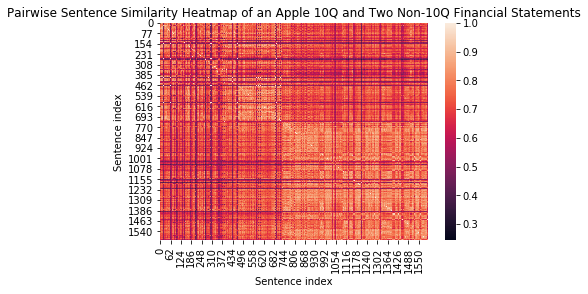

In [12]:
import seaborn
import matplotlib.pyplot as plt
# %matplotlib ipympl
seaborn.heatmap(cosine)
plt.title("Pairwise Sentence Similarity Heatmap of an Apple 10Q and Two Non-10Q Financial Statements")
plt.xlabel("Sentence index")
plt.ylabel("Sentence index")
plt.show()

range(0, 1606)


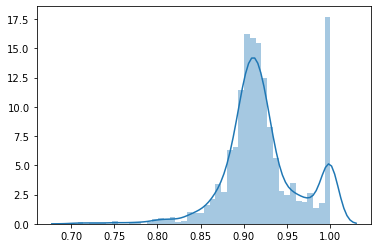

In [9]:
## plot histogram 
idcs = range(num_sent)
print(idcs)
seaborn.distplot(maxes)
# seaborn.scatterplot(list(range(num_sent)), maxes)


In [10]:
below_thresh = np.where(maxes > 1.0)
# print(below_thresh)
for low in below_thresh[0][:70]:
    print(sentences[low])

 The Company sells its products worldwide through its retail stores, online stores and direct sales force, as well as through third-party cellular network carriers, wholesalers, retailers and resellers
S
 The Act lowered the Company’s U
S
S
S
 In major states and major foreign jurisdictions, the years subsequent to 2003 generally remain open and could be subject to examination by the taxing authorities
 The State Aid Decision ordered Ireland to calculate and recover additional taxes from the Company for the period June 2003 through December 2014
S
 taxes, subject to any foreign tax credit limitations in the Act
 As of June 30, 2018, €4
S
0 billion, $10
4 billion was repurchased under the Company’s previous share repurchase program of up to $210 billion, thereby completing that program
 The Company’s new share repurchase program does not obligate it to acquire any specific number of shares
The Company offers an iPhone Upgrade Program, which is available to customers who purchase a quali